# How does motherhood impact wage?


Project objectives:
* Investigate and enrich the data (features, missing values, outliers)
* Determine quantitavively what motherhood is.
* Determine the impact motherhood has on wage.

Please refer to the README file of this repository to find the required packages and dateset for this kernel.

### Load data and packages 

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("classic")

In [56]:
df = pd.read_csv('motherhood.csv')

## Exploratory Data Analysis


In [57]:
df.head()    

,PUBID,wage,numChildren,age,educ,experience,tenure,marstat,fullTime,y2009
0,15,9.00,0,22,2.High school,1.129032,0.096154,No romantic union,False,0
1,15,12.00,0,27,2.High school,9.096774,1.750000,No romantic union,False,1
2,32,8.33,0,23,4.College,12.935484,0.192308,Cohabiting,True,0
3,32,44.75,1,28,4.College,17.903226,2.961538,Cohabiting,True,1
4,36,10.00,1,24,2.High school,5.096774,0.596154,Married,True,0


### Variable description

       1. PUBID: Candidate identification code.
       2. wage: Hourly wage in dollars.
       3. numChildren: Number of children the woman has.
       4. age: Age, in years.
       5. educ: Level of education.
       6. experience: Relevant work experience, in months.
       7. tenure: Current job tenure, in years.
       8. marstat: Marital status.
       9. fullTime: Employment status.
       10. y2009: The year of observation (binary: 2009 = 1, 2004 = 0)

### Univariate analysis 

####  Numerical variables

In [58]:
def histogram(var):
    plt.figure(figsize=(9,3))
    plt.hist(df[var], bins=50)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show

C:\Users\xxaa\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\xxaa\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


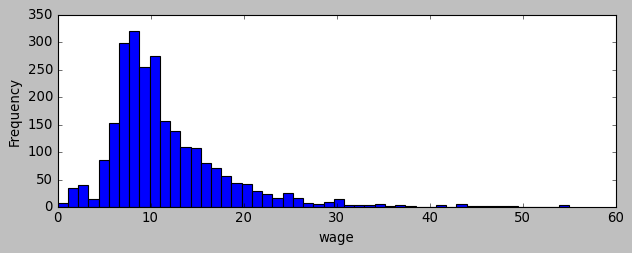

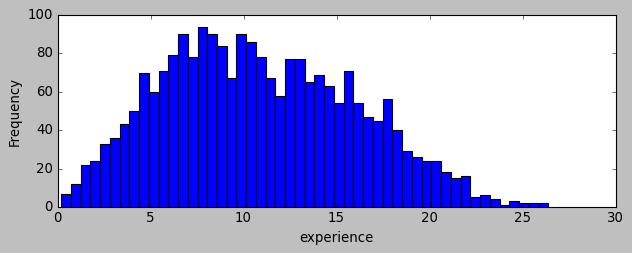

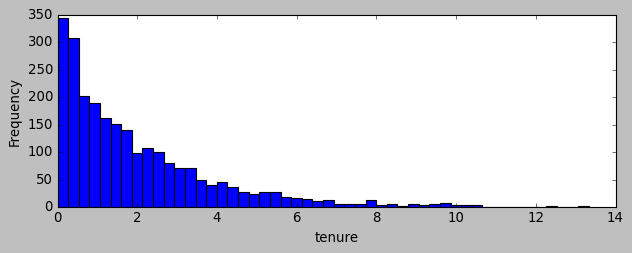

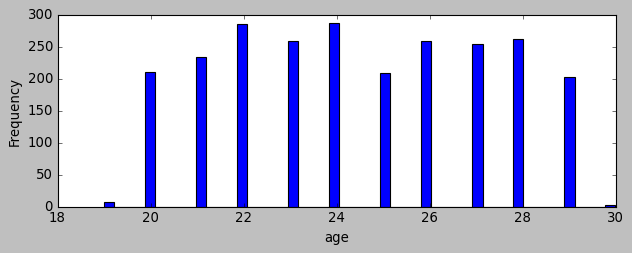

In [59]:
numerical = ['wage','experience','tenure','age']
for v in numerical:
    histogram(v)

#### Categorical variables 

In [60]:
catagorical = ['marstat','fullTime','numChildren','educ']
def countbar(var):  
    value = df[var].value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(value.index,value)
    plt.xlabel(var)
    plt.show()
    print(value)

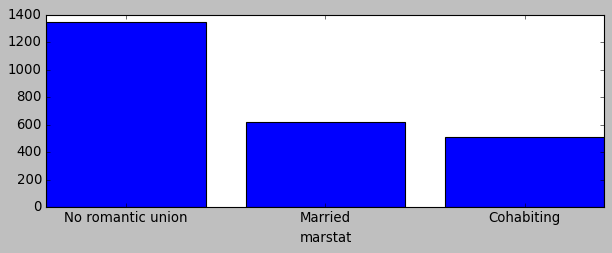

No romantic union    1347
Married               622
Cohabiting            507
Name: marstat, dtype: int64


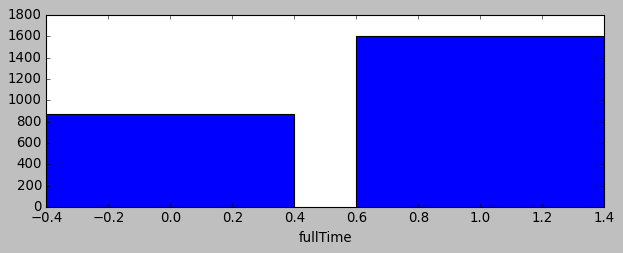

True     1607
False     868
Name: fullTime, dtype: int64


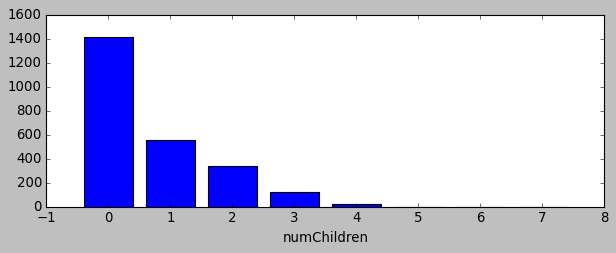

0    1420
1     555
2     345
3     124
4      29
5       4
7       1
6       1
Name: numChildren, dtype: int64


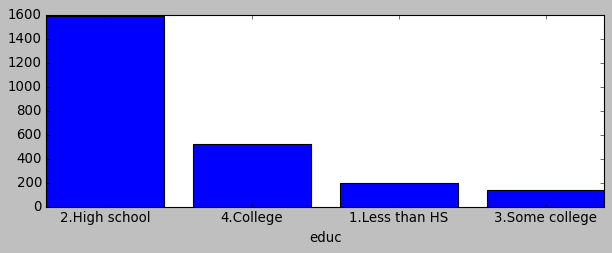

2.High school     1595
4.College          526
1.Less than HS     196
3.Some college     145
Name: educ, dtype: int64


In [61]:
for i in catagorical:
    countbar(i)

## Basic Data Analysis

* wage - numChildren
* wage - age
* wage - educ
* wage - marstat

#### Wage vs numChildren 

In [8]:
df[['wage','numChildren']].groupby(['numChildren'],as_index=False).mean()

,numChildren,wage
0,0,11.822986
1,1,11.778180
2,2,11.042232
3,3,10.343871
4,4,9.794138
5,5,7.900000
6,6,9.500000
7,7,6.000000


In [9]:
print('Wages for mothers vs non-mothers:')
print('Mothers:',  '$',np.around(np.mean(df.wage[df.numChildren > 0]),decimals = 2))
print('Non-mothers:', '$',np.around(np.mean(df.wage[df.numChildren == 0]),decimals = 2))
print('Difference in Mean Motherhood Wage for mothers and non-mothers:', '$',np.around(np.mean(df.wage[df.numChildren == 0]) - np.mean(df.wage[df.numChildren > 0]),decimals = 2))

Wages for mothers vs non-mothers:
Mothers: $ 11.29
Non-mothers: $ 11.82
Difference in Mean Motherhood Wage for mothers and non-mothers: $ 0.53


#### Wage vs Age 

In [10]:
df[['wage','age']].groupby(['age'],as_index=False).mean()

,age,wage
0,19,9.163750
1,20,7.695735
2,21,8.181752
3,22,9.064860
4,23,9.912973
5,24,10.767708
6,25,12.604048
7,26,13.978687
8,27,13.952627
9,28,14.982548


#### Wage vs Education

In [11]:
df[['wage','educ']].groupby(['educ'],as_index=False).mean()

,educ,wage
0,1.Less than HS,8.536122
1,2.High school,10.021668
2,3.Some college,13.290897
3,4.College,17.101521


#### Wage vs Marital Status 

In [12]:
df[['wage','marstat']].groupby(['marstat'],as_index=False).mean()

,marstat,wage
0,Cohabiting,12.211243
1,Married,13.072460
2,No romantic union,10.679592


## Data preparation & cleaning 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PUBID        2479 non-null   int64  
 1   wage         2479 non-null   float64
 2   numChildren  2479 non-null   int64  
 3   age          2479 non-null   int64  
 4   educ         2462 non-null   object 
 5   experience   2284 non-null   float64
 6   tenure       2457 non-null   float64
 7   marstat      2476 non-null   object 
 8   fullTime     2475 non-null   object 
 9   y2009        2479 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 193.8+ KB


In [14]:
df.describe()

,PUBID,wage,numChildren,age,experience,tenure,y2009
count,2479.000000,2479.000000,2479.000000,2479.000000,2284.000000,2457.000000,2479.000000
mean,4555.359419,11.596962,0.712384,24.468334,10.856562,1.971017,0.494151
std,2582.625196,6.343431,0.992695,2.803295,5.136250,1.960324,0.500067
min,15.000000,0.010000,0.000000,19.000000,0.193548,0.000000,0.000000
25%,2399.000000,7.600000,0.000000,22.000000,6.903226,0.500000,0.000000
50%,4532.000000,10.000000,0.000000,24.000000,10.354839,1.365385,0.000000
75%,6842.500000,14.000000,1.000000,27.000000,14.645161,2.788462,1.000000
max,9022.000000,55.000000,7.000000,30.000000,26.387097,13.326923,1.000000


### Outlier detection

Visualize outliers: 

In [15]:
outlierTest = ['wage','age','numChildren']
def boxplot(feature):
    plt.figure(figsize=(9,3))
    sns.boxplot(df[feature])

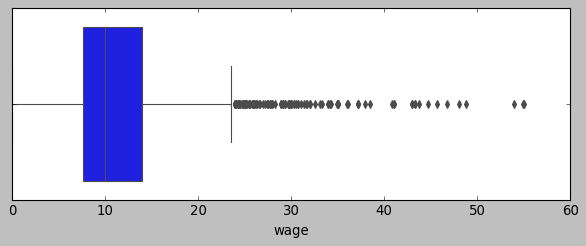

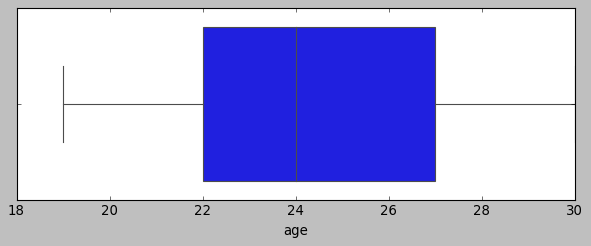

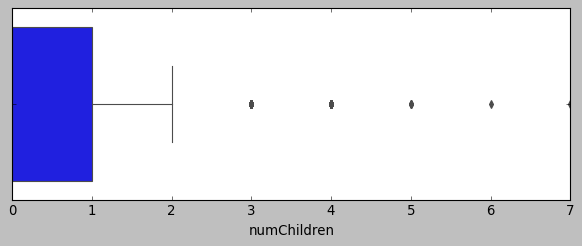

In [16]:
for o in outlierTest:
    boxplot(o)

* Wage contains a significant amount of outliers.
* numChildren contains a small amount of outliers.

#### Should I exclude wage outliers? 

In [17]:
from scipy import stats
from scipy.stats import iqr

In [18]:
#Viewing and removing outliers
def outlierDataFramex(dataframe, f):
    
    Q1 = np.percentile(dataframe[f],25)
    Q3 = np.percentile(dataframe[f],75)

    lb = Q1 - (1.5 * iqr(dataframe[f]))
    ub = Q3 + (1.5 * iqr(dataframe[f]))
    
    dfoutlier = dataframe[(dataframe[f] < lb) | (dataframe[f]  > ub)]
    
    #Use dfoutlierindex to use .drop to drop the outlier rows via index.
    global dfoutlierindex
    dfoutlierindex = dataframe[(dataframe[f] < lb) | (dataframe[f]  > ub)].index
    
    return dfoutlier


In [19]:
outlierDataFramex(df,'wage')

,PUBID,wage,numChildren,age,educ,experience,tenure,marstat,fullTime,y2009
3,32,44.75,1,28,4.College,17.903226,2.961538,Cohabiting,True,1
25,104,24.48,0,28,4.College,21.451613,1.038462,Cohabiting,True,1
38,157,37.14,0,27,4.College,10.032258,3.384615,Married,True,1
41,166,35.00,0,27,4.College,13.096774,1.788462,No romantic union,True,1
43,177,31.99,0,28,4.College,NaN,0.076923,Married,True,1
...,...,...,...,...,...,...,...,...,...,...
2244,8201,24.25,2,26,3.Some college,10.290323,0.538462,Cohabiting,True,1
2344,8524,25.00,1,26,4.College,12.483871,1.519231,Married,False,1
2412,8751,30.00,1,29,3.Some college,16.096774,0.461538,No romantic union,True,1
2436,8871,31.54,0,29,4.College,18.129032,2.788462,Married,True,1


* As shown above the outlier dataframe displays a high amount of women with a college level education.

Although these are technically outliers, such that they lie within the specified range of an outlier, it is clear that these individuals represent a specific population of mothers so I will not exclude them from the dataset.

* For comparison purposes I have included a dataset without wage outliers below.

In [20]:
df_noOutlier = df.drop(dfoutlierindex)

### Missing values 

In [21]:
df.isnull().sum()

PUBID            0
wage             0
numChildren      0
age              0
educ            17
experience     195
tenure          22
marstat          3
fullTime         4
y2009            0
dtype: int64

In [22]:
#Replace missing 'experience' values with the mean.
df.experience = df.experience.fillna(np.mean(df.experience))

In [23]:
df[df.experience.isnull()]

,PUBID,wage,numChildren,age,educ,experience,tenure,marstat,fullTime,y2009


In [24]:
df = df.dropna()

Check for missing data:

In [25]:
df.isnull().sum()

PUBID          0
wage           0
numChildren    0
age            0
educ           0
experience     0
tenure         0
marstat        0
fullTime       0
y2009          0
dtype: int64

## Data visualization 

### Data visualization preparation 

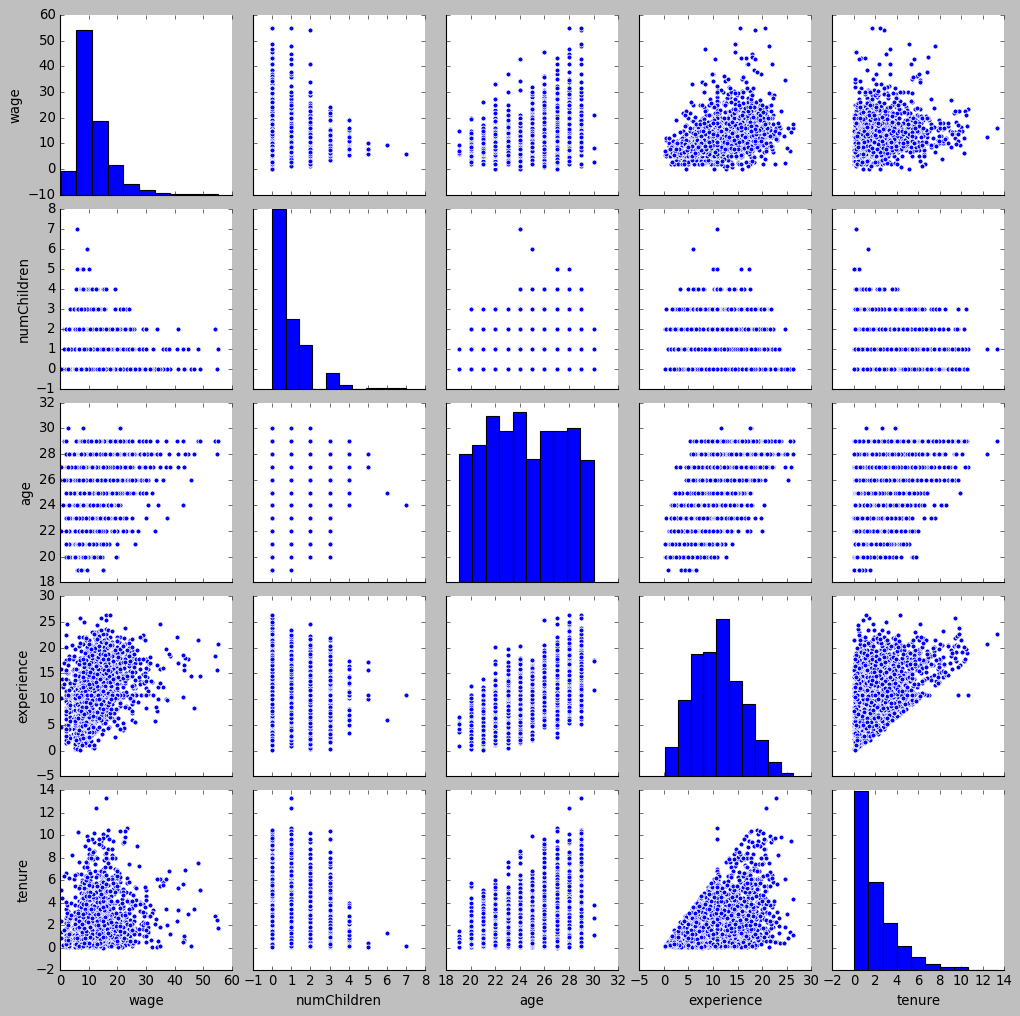

In [26]:
sns.pairplot(df.drop(['PUBID', 'y2009','fullTime'],axis=1), palette='set2')

### Education level and number of children.

Text(0.5, 1.0, 'Education level by Count')

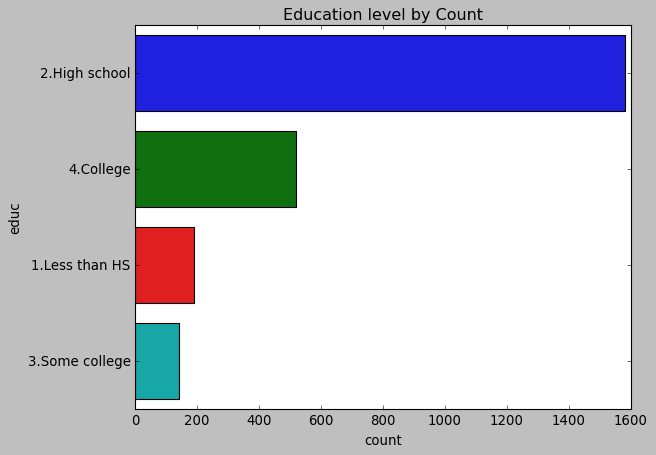

In [27]:
sns.countplot(y='educ',data=df)
plt.title('Education level by Count')

### How are these levels of education distributed with numChildren? 

Text(0.5, 1.0, 'Education level with respect to numChildren, by count')

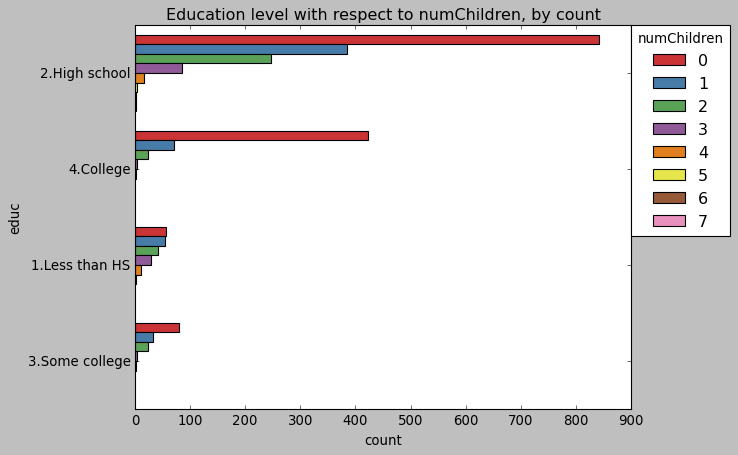

In [28]:
sns.countplot(y='educ', hue='numChildren', data=df, palette="Set1")
plt.legend(title='numChildren',bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title('Education level with respect to numChildren, by count')

### Age and number of children

Text(0.5, 1.0, 'Age with respect to numChildren, by count')

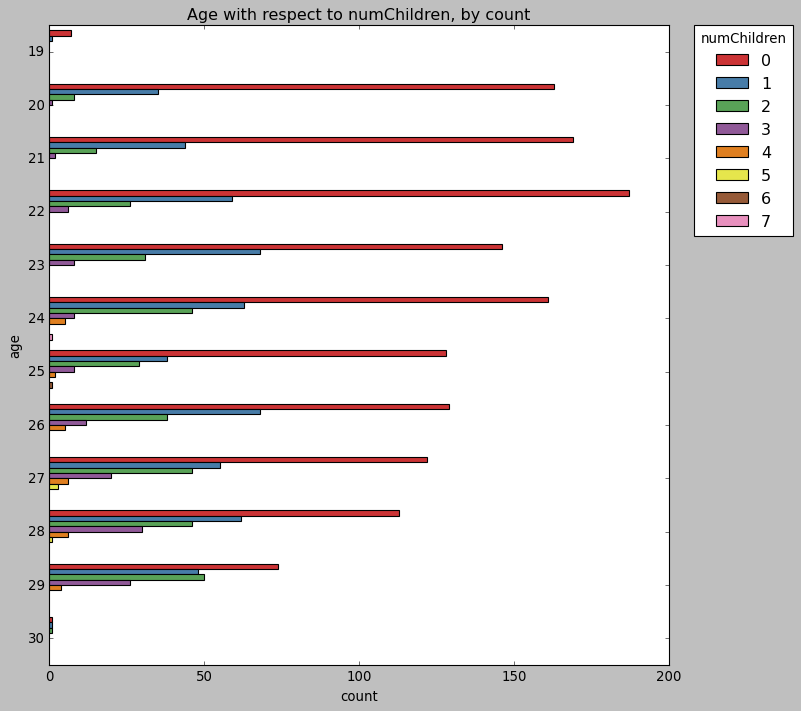

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(y='age', hue='numChildren', data=df, palette="Set1")
plt.legend(title='numChildren',bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title('Age with respect to numChildren, by count')

### Histogram for wage, with respect to numChildren 

* Removing the cases for 6 and 7 children (each case has 1 child and cannot be made into a histogram)

In [30]:
dfu = df
dfu.numChildren = df.numChildren.replace([6,7],np.nan).dropna()

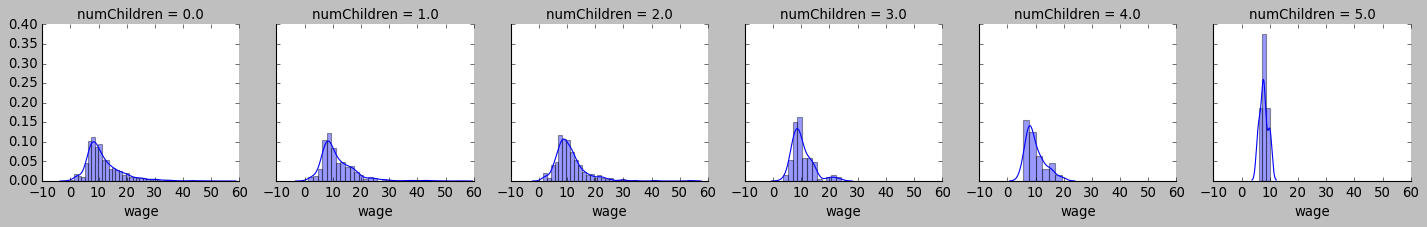

In [31]:
u = sns.FacetGrid(dfu, col='numChildren')
u.map(sns.distplot, 'wage')

### Comparing motherhood vs non-motherhood. 

#### Create isMother column
Mother = 1, Non-mother = 0

In [32]:
df['isMother'] = [0 if c == 0 else 1 for c in df.numChildren]

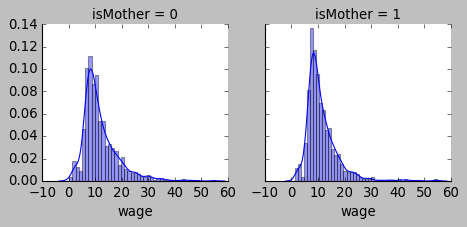

In [33]:
u = sns.FacetGrid(df, col='isMother')
u.map(sns.distplot, 'wage')

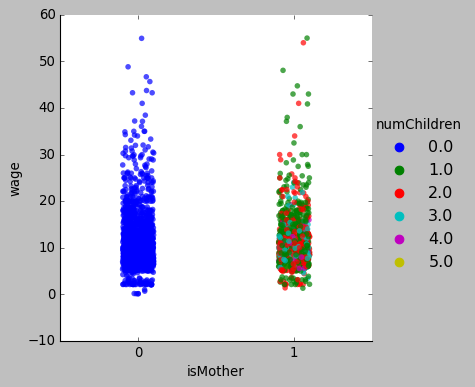

In [34]:
sns.catplot(x='isMother', y='wage',hue='numChildren',alpha=0.7 , data=df)

* Motherhood seems to have some impact on wage however there seems to be other factors that also relate to motherhood that heavily impact wage. 
* For example, being a mother could make you less likely to have a higher level of education thus preventing one from earning a college level salary. 

### Logistic Regression

#### isMother vs Wage 

In [35]:
import statsmodels.api as sm
dfLR = df[['wage' , 'isMother']]

In [36]:
LR = sm.Logit(dfLR.isMother, dfLR.wage).fit()
print(LR.summary())

Optimization terminated successfully.
         Current function value: 0.681601
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               isMother   No. Observations:                 2433
Model:                          Logit   Df Residuals:                     2432
Method:                           MLE   Df Model:                            0
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:               0.0001844
Time:                        10:38:24   Log-Likelihood:                -1658.3
converged:                       True   LL-Null:                       -1658.6
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wage          -0.0234      0.003     -7.374      0.000      -0.030      -0.017


Not only is the correlation coefficient very small, but the R-squared value suggests that in this context, motherhood is a poor predictor for wage and seems to imply that the relationship is weak.

### Multiple Linear Regression

Using statsmodels to determine factors that may impact wage more than motherhood:
* numChildren
* experience


In [52]:
mlr = df[['wage','educ','numChildren','fullTime','isMother','experience']]
mlr = mlr.dropna()

In [54]:
Y = mlr['wage']
x = mlr[[ 'experience', 'isMother','numChildren']]

X = sm.add_constant(x)
result = sm.OLS(np.asarray(Y),np.asarray(X)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     185.2
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          4.02e-108
Time:                        10:50:37   Log-Likelihood:                -7698.9
No. Observations:                2431   AIC:                         1.541e+04
Df Residuals:                    2427   BIC:                         1.543e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0643      0.291     20.831      0.000       5.493       6.635
x1             0.5491      0.024     23.238      0.000       0.503       0.595
x2             0.2505      0.433      0.578      0.563      -0.599       1.100
x3            -0.7718      0.219     -3.527      0.000      -1.201      -0.343
==============================================================================
Omnibus:                     1069.213   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7427.094
Skew:                           1.944   Prob(JB):                         0.00
Kurtosis:                      10.630   Cond. No.                         48.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The R-squared value suggests that this regression model illustrates a small impact on wage from the independent variables.
* Experience is a much stronger indicator of wage than motherhood however motherhood does slightly impact wage.